# Homework 2

## FINM 37500 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# 1. Stripping Caps

The file `data/cap_curves_2024-02-16.xlsx` has market data on the following curves:
* swap rates (SOFR)
* discount factors
* forward rates 
* flat volatilites

A few details
* the swap and forward rates are quarterly compounded.
* the flat volatilites are (Black) quotes on caps containing caplets ranging from expiration of $\tau=.5$ to $\tau=T$.
* the details of the data prep can be found in `build_data/Process Cap Quotes`.

## Context

Recall that 
* a cap is made of caplets with $.5\le \tau \le T$
* the flat volatility at $T$ is input for every caplet corresponding to the cap of $T$.
* use Black's formula for this calculation.
* in Black's formula, use $T-0.25$ as the rate for the caplet is determined one period before it is paid.

As for the cap parameters,
* the cap's strike is the swap rate with the same tenor. So the $T=2$ cap is struck at the swap rate of $\tau=2$.
* the notional of the cap is $100.
* the payoff of each caplet is

$$\frac{100}{n}\max(r-K,0)$$

where $n$ is the frequency; here $n=4$.

Thus, the corresponding value in Black's fomula for a caplet is
$$P^{\text{cap}}_{T} = \frac{100}{n} \sum_{\tau=.5}^T B_{\text{call}}(\overline{\sigma}_T, \tau-.25, K=s_T, f_{\tau}, Z_{\tau})$$
Note here that for every caplet in cap $T$, we plug in the same 
* flat vol with tenor $T$.
* strike which is the swap rate of maturity $T$.

The notation above is using subscripts for tenor / maturity rather than time period. That is, $Z_{\tau}$ denotes $Z(t, t+\tau)$ which is today's discount factor for maturity $\tau$. Similarly for the swap rate of tenor $T$, denoted above $s_T$ and forward rate $f(t,t+\tau-.25, t+\tau)$ denoted simply $f_{\tau}$.

### Black's Formula
Recall Black's formula:

$$\begin{align}
B_{\text{call}}(\sigma, T, K, f, Z) = &\; Z\left[f\mathcal{N}\left(d_1\right) - K\mathcal{N}(d_2)\right] \\
d_1 =& \frac{\ln\left(\frac{f}{K}\right) + \frac{\sigma^2}{2}T}{\sigma\sqrt{T}} \\
d_2 =& d_1 -\sigma\sqrt{T}
\end{align}
$$

In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '../cmds')
from ficcvol import *
from binomial import *
from ratecurves import *

import datetime
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

## 1.1 Cap Prices

For each cap maturity, $.5\le T \le 10$, use the flat volatility to get the price of the cap.

Report the cap prices across expirations, $.5\le T \le 10$.

Plot the cap prices across expirations.

In [2]:
DATE = '2024-02-16'
curves = pd.read_excel(f'../data/cap_curves_{DATE}.xlsx', sheet_name=f'rate curves {DATE}').set_index('tenor')

capcurves = flat_to_forward_vol(curves)
capcurves

/Users/brycehopkins/Library/CloudStorage/OneDrive-TheUniversityofChicago/FINMATH/FI Derivatives/finm-fiderivs-2024/homework/../cmds/ficcvol.py:121: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  capcurves['caplet prices'].loc[t] = capcurves.l

,flat vols,caplet prices,fwd vols,cap prices
tenor,,,,
0.25,NaN,NaN,NaN,NaN
0.50,0.164498,0.034285,0.164498,0.034285
0.75,0.189530,0.061272,0.244029,0.095557
1.00,0.214562,0.091266,0.327210,0.186823
1.25,0.257098,0.146312,0.518534,0.333136
1.50,0.288577,0.168763,0.541362,0.501898
1.75,0.310668,0.182799,0.544506,0.684697
2.00,0.325038,0.189741,0.525341,0.874438
2.25,0.333356,0.190485,0.534827,1.064923


<Axes: xlabel='tenor'>

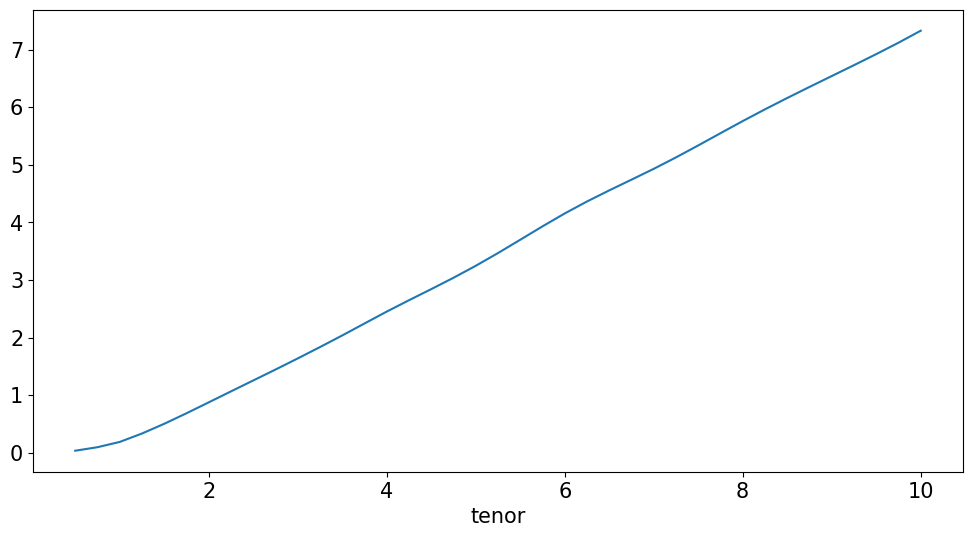

In [3]:
capcurves['cap prices'].plot()

## 1.2 Caplet Prices and Forward Volatilities

Using the cap prices, strip out the
* caplet prices
* forward volatility at $\tau$ which properly prices caplet $\tau$ using Black's formula.

List and plot the forward volatility versus the flat volatiltiy.

<Axes: xlabel='tenor'>

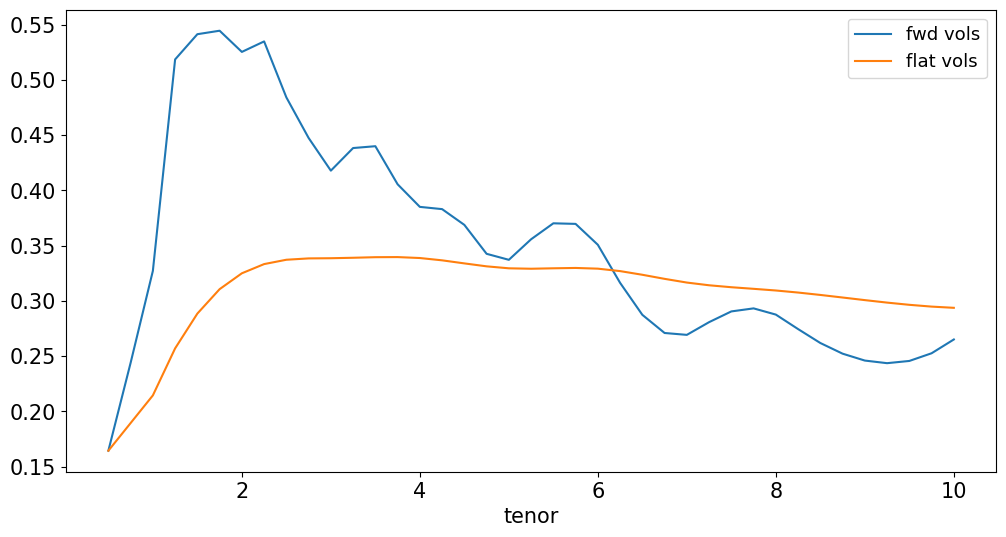

In [4]:
capcurves[['fwd vols', 'flat vols']].plot()

## 1.3 Calibrate a BDT model 

Use data from the file `data/cap_curves_2024-02-16.xlsx` to calibrate the BDT model.
* Use the forward volatilities calculated in 1.2 to calibrate $\sigma$ at each step. 
* You do not have a forward volatility at $\tau=.25$ given there is no caplet there. For purposes of the BDT model, assume $\sigma_{.25}$ is equal to the forward volatility at the first estimated period, $t=0.50$. That is, use the first estimated forward vol (corresponding to $\tau=.50$ for both $t=.25$ and $t=.50$ in the BDT tree.    

Given these volatility parameters, calibrate the series of $\theta$ to fit the zero-coupon bond prices given by `discounts` (multiplied by 100).

**Display**
* the series of $\theta$ parameters.
* the tree of rates from $0\le t \le 10$.

In [5]:
quotes = curves['discounts']*100

sigmas = capcurves['fwd vols']
sigmas.iloc[0] = sigmas.iloc[1]

theta, ratetree = estimate_theta(sigmas,quotes)
format_bintree(theta.to_frame().T, style='{:.2%}')

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.00,7.25,7.50,7.75,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75
theta,,-11.18%,-29.62%,-44.17%,-96.03%,-64.37%,-54.44%,-38.46%,-49.59%,-9.02%,0.17%,11.93%,-12.15%,-0.83%,27.02%,21.08%,5.65%,19.09%,40.00%,35.05%,20.19%,15.02%,15.61%,20.20%,27.72%,32.20%,33.55%,31.84%,27.61%,24.58%,23.21%,23.58%,25.41%,26.92%,27.77%,27.95%,27.37%,25.94%,23.58%,20.15%


In [6]:
format_bintree(ratetree,style='{:.2%}')

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.00,7.25,7.50,7.75,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5.29%,5.58%,5.86%,6.18%,6.30%,7.03%,8.05%,9.51%,10.98%,13.67%,17.11%,21.72%,26.23%,32.62%,42.75%,54.63%,67.10%,84.64%,111.02%,143.44%,180.24%,225.20%,281.71%,353.12%,443.32%,554.75%,690.82%,855.89%,1055.30%,1297.62%,1592.35%,1950.30%,2384.03%,2906.86%,3534.83%,4286.97%,5185.45%,6256.26%,7529.75%,9041.48%
1,,4.74%,4.97%,5.24%,5.34%,5.96%,6.83%,8.07%,9.31%,11.60%,14.51%,18.43%,22.25%,27.67%,36.26%,46.34%,56.92%,71.80%,94.18%,121.69%,152.90%,191.04%,238.98%,299.55%,376.08%,470.60%,586.04%,726.07%,895.23%,1100.80%,1350.82%,1654.48%,2022.42%,2465.95%,2998.67%,3636.72%,4398.92%,5307.30%,6387.64%,7670.06%
2,,,3.89%,4.10%,4.18%,4.67%,5.35%,6.32%,7.30%,9.09%,11.37%,14.44%,17.44%,21.68%,28.41%,36.31%,44.60%,56.25%,73.79%,95.34%,119.80%,149.68%,187.23%,234.69%,294.64%,368.70%,459.14%,568.85%,701.38%,862.44%,1058.32%,1296.23%,1584.50%,1931.98%,2349.35%,2849.24%,3446.40%,4158.09%,5004.49%,6009.23%
3,,,,2.96%,3.02%,3.37%,3.86%,4.56%,5.26%,6.55%,8.20%,10.41%,12.57%,15.63%,20.48%,26.18%,32.15%,40.55%,53.19%,68.73%,86.36%,107.91%,134.98%,169.20%,212.42%,265.81%,331.01%,410.10%,505.65%,621.76%,762.98%,934.49%,1142.31%,1392.83%,1693.72%,2054.11%,2484.62%,2997.70%,3607.90%,4332.25%
4,,,,,1.80%,2.00%,2.30%,2.71%,3.13%,3.90%,4.88%,6.20%,7.48%,9.31%,12.19%,15.58%,19.14%,24.15%,31.67%,40.92%,51.42%,64.25%,80.37%,100.74%,126.47%,158.26%,197.08%,244.17%,301.06%,370.19%,454.27%,556.39%,680.13%,829.28%,1008.43%,1223.00%,1479.33%,1784.81%,2148.12%,2579.39%
5,,,,,,1.17%,1.34%,1.58%,1.82%,2.27%,2.84%,3.61%,4.36%,5.42%,7.10%,9.07%,11.14%,14.05%,18.43%,23.81%,29.92%,37.39%,46.77%,58.62%,73.60%,92.10%,114.69%,142.10%,175.20%,215.43%,264.37%,323.79%,395.80%,482.60%,586.86%,711.73%,860.90%,1038.68%,1250.11%,1501.09%
6,,,,,,,0.78%,0.92%,1.06%,1.32%,1.65%,2.09%,2.53%,3.14%,4.12%,5.26%,6.46%,8.15%,10.69%,13.82%,17.36%,21.69%,27.13%,34.01%,42.70%,53.43%,66.54%,82.43%,101.64%,124.98%,153.37%,187.84%,229.62%,279.97%,340.45%,412.90%,499.43%,602.57%,725.22%,870.82%
7,,,,,,,,0.54%,0.63%,0.78%,0.97%,1.24%,1.49%,1.86%,2.43%,3.11%,3.82%,4.82%,6.32%,8.17%,10.27%,12.83%,16.05%,20.11%,25.25%,31.60%,39.35%,48.75%,60.11%,73.91%,90.69%,111.08%,135.78%,165.56%,201.33%,244.17%,295.34%,356.33%,428.86%,514.96%
8,,,,,,,,,0.37%,0.46%,0.57%,0.72%,0.88%,1.09%,1.43%,1.82%,2.24%,2.82%,3.70%,4.79%,6.01%,7.51%,9.40%,11.78%,14.79%,18.51%,23.05%,28.56%,35.21%,43.29%,53.13%,65.07%,79.54%,96.98%,117.93%,143.03%,173.00%,208.73%,251.22%,301.65%


***

# 2. Pricing a Callable Bond with BDT

## Freddie Mac

The U.S. has many forms of *agency* debt in addition to *Treasury* debt. The largest of these *agency* issuers are the housing entities commonly referred to as Freddie Mac and Fannie Mae. While technically distinct from the U.S. Treasury, they are widely seen as having the full credit and backing of the Treasury--particularly after the bailouts of 2008.

Thus, we will examine this agency debt as (credit) risk-free, just like Treasury debt.

Consider the Freddie Mac bond with Bloomberg ID `COZD1131782`, CUSIP `3134H1TN3`.
* Issued 2024-02-16
* Matures 2034-02-21
* Semiannual coupons
* Coupon rate 6.00%

Note that these bonds are not a niche market. Just this particular bond was issued with \$15 billion face value.

## 2.1 Price the Freddie Mac Bond


Assume today is `2024-02-16`.
* The market price on this day is `$99.953`.
* Approximate the TTM (time-to-maturity) to be exactly 10 years.

Price this bond using the model calibrated from  data.
* Price it with the BDT model calibrated in the previous problem.
* Note that the coupons are paid semiannually whereas the tree steps are quarterly.

Report the tree of bond prices, emphasizing the current modeled price.

How does our modeled price compare to the market price?

In [7]:
FACE = 100
T=10
compound = 4
cpn = .06
cpn_freq = 2

STRIKE = 100
CLEANCALL = True

dt = 1/compound
tsteps = int(T/dt)

In [8]:
wrapper_bond = lambda r: payoff_bond(r, dt, facevalue=FACE * (1+cpn/cpn_freq))
payoff_call = lambda p: np.maximum(p-STRIKE,0)

In [9]:
cftree = construct_bond_cftree(T, compound, cpn)
bondtree = bintree_pricing(payoff=wrapper_bond, ratetree=ratetree.iloc[:tsteps,:tsteps], cftree=cftree)
format_bintree(bondtree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.00,7.25,7.50,7.75,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,116.65,111.87,103.58,97.71,88.36,81.46,71.30,63.99,53.79,46.77,37.32,31.51,23.63,19.53,13.49,11.29,7.13,6.39,3.51,3.71,1.71,2.29,0.79,1.40,0.29,0.78,0.08,0.36,0.01,0.12,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,,124.53,117.30,112.50,104.11,98.05,88.51,81.51,71.27,63.80,53.47,46.39,36.90,30.94,22.89,18.74,12.75,10.46,6.29,5.57,2.89,3.09,1.26,1.78,0.49,1.00,0.15,0.50,0.03,0.19,0.00,0.05,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
2,,,128.72,125.04,117.84,112.97,104.55,98.55,89.08,82.10,71.88,64.50,54.25,47.09,37.42,31.39,23.33,18.95,12.75,10.34,6.21,5.39,2.71,2.79,1.05,1.49,0.35,0.78,0.09,0.35,0.01,0.12,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
3,,,,134.90,128.83,125.19,118.05,113.36,105.16,99.34,90.08,83.40,73.49,66.25,56.01,48.96,39.41,33.21,24.87,20.32,14.04,11.37,6.98,5.85,3.00,2.89,1.12,1.44,0.36,0.70,0.09,0.30,0.01,0.09,0.00,0.02,0.00,0.00,0.00,0.00
4,,,,,136.98,134.41,128.44,125.03,118.17,113.76,105.88,100.50,91.71,85.42,75.78,68.95,59.12,52.22,42.63,36.49,28.21,23.48,16.81,13.71,8.85,7.32,4.09,3.71,1.66,1.85,0.58,0.91,0.16,0.41,0.03,0.15,0.00,0.04,0.01,0.16
5,,,,,,140.79,135.73,133.34,127.60,124.43,117.86,113.85,106.42,101.47,93.07,87.30,78.25,71.83,62.30,55.80,46.63,40.68,32.33,27.40,20.42,16.95,11.65,9.70,5.98,5.21,2.74,2.69,1.12,1.37,0.41,0.67,0.17,0.36,0.31,2.42
6,,,,,,,140.67,139.03,134.13,131.93,126.42,123.56,117.34,113.70,106.64,102.18,94.36,89.09,80.49,74.67,65.81,59.83,51.00,45.28,37.03,32.13,25.03,21.35,15.69,13.33,9.11,7.93,4.99,4.65,2.72,2.88,1.81,2.49,3.27,11.68
7,,,,,,,,142.86,138.56,137.05,132.31,130.32,125.06,122.48,116.56,113.30,106.71,102.71,95.35,90.67,82.78,77.62,69.33,63.89,55.56,50.29,42.41,37.77,30.79,27.12,21.33,18.82,14.38,13.06,10.00,9.84,8.39,10.13,13.16,28.43
8,,,,,,,,,141.55,140.51,136.32,134.95,130.38,128.58,123.54,121.23,115.66,112.76,106.56,103.06,96.31,92.25,84.97,80.44,72.81,68.07,60.43,55.82,48.54,44.44,37.91,34.69,29.31,27.32,23.51,23.24,21.85,24.97,30.20,48.45


In [10]:
accint = construct_accint(bondtree.columns.values, compound, cpn)
cleantree = np.maximum(bondtree.subtract(accint,axis=1),0)

format_bintree(cleantree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.00,7.25,7.50,7.75,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,116.65,110.37,103.58,96.21,88.36,79.96,71.30,62.49,53.79,45.27,37.32,30.01,23.63,18.03,13.49,9.79,7.13,4.89,3.51,2.21,1.71,0.79,0.79,0.00,0.29,0.00,0.08,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,,123.03,117.30,111.00,104.11,96.55,88.51,80.01,71.27,62.30,53.47,44.89,36.90,29.44,22.89,17.24,12.75,8.96,6.29,4.07,2.89,1.59,1.26,0.28,0.49,0.00,0.15,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,,,128.72,123.54,117.84,111.47,104.55,97.05,89.08,80.60,71.88,63.00,54.25,45.59,37.42,29.89,23.33,17.45,12.75,8.84,6.21,3.89,2.71,1.29,1.05,0.00,0.35,0.00,0.09,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,,,,133.40,128.83,123.69,118.05,111.86,105.16,97.84,90.08,81.90,73.49,64.75,56.01,47.46,39.41,31.71,24.87,18.82,14.04,9.87,6.98,4.35,3.00,1.39,1.12,0.00,0.36,0.00,0.09,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,,,,,136.98,132.91,128.44,123.53,118.17,112.26,105.88,99.00,91.71,83.92,75.78,67.45,59.12,50.72,42.63,34.99,28.21,21.98,16.81,12.21,8.85,5.82,4.09,2.21,1.66,0.35,0.58,0.00,0.16,0.00,0.03,0.00,0.00,0.00,0.01,0.00
5,,,,,,139.29,135.73,131.84,127.60,122.93,117.86,112.35,106.42,99.97,93.07,85.80,78.25,70.33,62.30,54.30,46.63,39.18,32.33,25.90,20.42,15.45,11.65,8.20,5.98,3.71,2.74,1.19,1.12,0.00,0.41,0.00,0.17,0.00,0.31,0.92
6,,,,,,,140.67,137.53,134.13,130.43,126.42,122.06,117.34,112.20,106.64,100.68,94.36,87.59,80.49,73.17,65.81,58.33,51.00,43.78,37.03,30.63,25.03,19.85,15.69,11.83,9.11,6.43,4.99,3.15,2.72,1.38,1.81,0.99,3.27,10.18
7,,,,,,,,141.36,138.56,135.55,132.31,128.82,125.06,120.98,116.56,111.80,106.71,101.21,95.35,89.17,82.78,76.12,69.33,62.39,55.56,48.79,42.41,36.27,30.79,25.62,21.33,17.32,14.38,11.56,10.00,8.34,8.39,8.63,13.16,26.93
8,,,,,,,,,141.55,139.01,136.32,133.45,130.38,127.08,123.54,119.73,115.66,111.26,106.56,101.56,96.31,90.75,84.97,78.94,72.81,66.57,60.43,54.32,48.54,42.94,37.91,33.19,29.31,25.82,23.51,21.74,21.85,23.47,30.20,46.95


In [12]:
if CLEANCALL:
    undertree = cleantree
else:
    undertree = bondtree
    
calltree = bintree_pricing(payoff=payoff_call, ratetree=ratetree.iloc[:tsteps,:tsteps], undertree= undertree, style='american')
format_bintree(calltree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.00,7.25,7.50,7.75,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,19.07,15.06,11.52,8.51,6.06,4.15,2.73,1.72,1.03,0.59,0.31,0.16,0.07,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,,23.59,19.02,14.88,11.22,8.16,5.72,3.85,2.49,1.53,0.90,0.50,0.26,0.12,0.05,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,,,28.72,23.64,18.94,14.58,10.84,7.79,5.37,3.56,2.26,1.37,0.78,0.42,0.21,0.10,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,,,,33.40,28.83,23.69,18.67,14.18,10.45,7.39,5.02,3.28,2.05,1.21,0.68,0.36,0.17,0.08,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,,,,,36.98,32.91,28.44,23.53,18.22,13.80,10.00,6.97,4.68,3.01,1.85,1.07,0.59,0.30,0.14,0.06,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,,,,,,39.29,35.73,31.84,27.60,22.93,17.86,13.29,9.47,6.52,4.32,2.73,1.64,0.93,0.49,0.24,0.11,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,,,,,,,40.67,37.53,34.13,30.43,26.42,22.06,17.34,12.63,8.90,6.07,3.95,2.45,1.44,0.79,0.41,0.19,0.08,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,,,,,,,,41.36,38.56,35.55,32.31,28.82,25.06,20.98,16.56,11.91,8.34,5.58,3.56,2.16,1.24,0.66,0.32,0.14,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,,,,,,,,,41.55,39.01,36.32,33.45,30.38,27.08,23.54,19.73,15.66,11.26,7.74,5.08,3.17,1.88,1.04,0.53,0.24,0.10,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [13]:
QUOTE_CALLABLE_CLEAN = 99.953
num_accrued = int((T*compound) %cpn_freq)
quote_callable_dirty = QUOTE_CALLABLE_CLEAN + num_accrued * (cpn/compound)*FACE

callablebondtree = bondtree - calltree
model_price_dirty = callablebondtree.iloc[0,0]
model_price_clean = model_price_dirty - accint.iloc[0]

prices = pd.DataFrame({'clean':[QUOTE_CALLABLE_CLEAN, model_price_clean], 'dirty':[quote_callable_dirty, model_price_dirty]}, index=['market quote','model'])
prices.style.format('{:.2f}')

,clean,dirty
market quote,99.95,99.95
model,97.57,97.57


Our model price is below the market price.

## 2.2 Callable Bond

One important difference between Treasury debt and this bond is that this bond is **callable**
* Note that the holder of the bond is short this call option; (the issuer has the optionality.) 

#### Style
* (approximately) American style
* called only on quarterly dates, not any date
* since our tree is quarterly, this means callable on any date on our tree.

#### Strike
* Strike is 100.
* The strike is based on the **clean** price of the bond, meaning the price which does not account for accrued interest.
    * In pricing the bond in the previous problem, you should have considered the accrued coupons, or dirty prices.
    * But in analyzing the option, you must consider its moneyness and payoff based on the clean price.

### Pricing
Use the BDT model to price this implicit American call option and the resulting callable bond.
* Note that the price of the callable bond is your answer to the previous question minus this American option.
* How close is the modeled price to the market quoted price now that you are accounting for the short embedded option? 

Does the price of the callable bond ever get above \$100?

In [14]:
callablebondtree

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,...,7.50,7.75,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75
state,,,,,,,,,,,,,,,,,,,,,
0,97.574452,96.806729,92.052890,89.208198,82.297672,77.308855,68.573050,62.272052,52.757106,46.183820,...,0.000661,0.022888,0.000011,0.002094,2.935593e-08,0.000066,6.644242e-12,4.835912e-07,1.669862e-15,1.571004e-08
1,NaN,100.938646,98.281332,97.612817,92.894883,89.897595,82.784514,77.662325,68.783314,62.265833,...,0.002829,0.047960,0.000096,0.006306,7.648433e-07,0.000338,8.115485e-10,5.185473e-06,1.814937e-12,4.843631e-07
2,NaN,NaN,100.000000,101.406350,98.904679,98.389459,93.709818,90.757894,83.705642,78.540663,...,0.014768,0.117727,0.001111,0.023965,2.825938e-05,0.002419,1.596422e-07,9.173489e-05,3.811429e-09,3.078934e-05
3,NaN,NaN,NaN,101.500000,100.000000,101.500000,99.379800,99.185671,94.700966,91.951824,...,0.089391,0.298584,0.014319,0.092754,1.178623e-03,0.017671,3.822450e-05,1.670496e-03,9.987193e-06,2.037801e-03
4,NaN,NaN,NaN,NaN,100.000000,101.500000,100.000000,101.500000,99.942962,99.956830,...,0.578070,0.905673,0.161690,0.405208,3.286682e-02,0.145012,4.871653e-03,3.643754e-02,5.999295e-03,1.630437e-01
5,NaN,NaN,NaN,NaN,NaN,101.500000,100.000000,101.500000,100.000000,101.500000,...,2.742844,2.693725,1.117665,1.365512,4.101249e-01,0.672845,1.652218e-01,3.569893e-01,3.095263e-01,2.415751e+00
6,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,101.500000,100.000000,101.500000,...,9.114899,7.929660,4.986579,4.647315,2.716420e+00,2.884475,1.809182e+00,2.486222e+00,3.271582e+00,1.167759e+01
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.500000,100.000000,101.500000,...,21.325041,18.818692,14.378198,13.059290,9.999363e+00,9.840910,8.386257e+00,1.012522e+01,1.315681e+01,2.842641e+01
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,101.500000,...,37.910675,34.685669,29.306642,27.320160,2.351061e+01,23.241155,2.185194e+01,2.497106e+01,3.019629e+01,4.845336e+01


The callable bond does indeed rise over $100.

## 2.3 Exercising the Option

Show a heatmap of the nodes in which the American bond is exercised.

Is it exercised every time it is in-the-money?

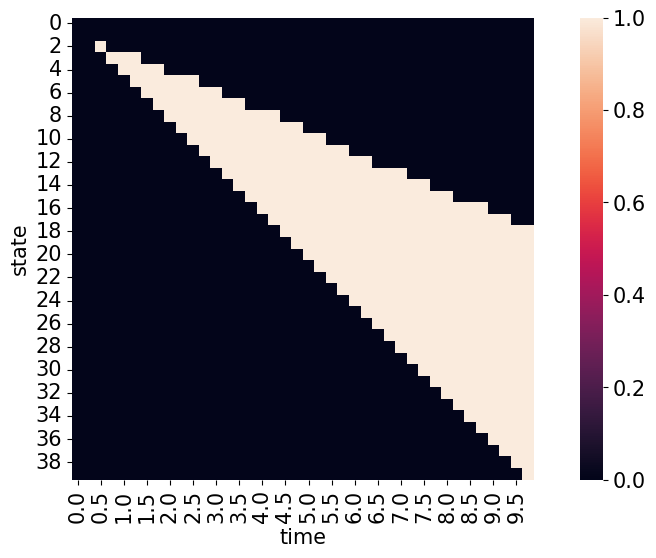

In [17]:
# WHEN IT IS EXCERCISED
sns.heatmap(exercise_decisions(payoff_call,undertree,calltree),square=True);

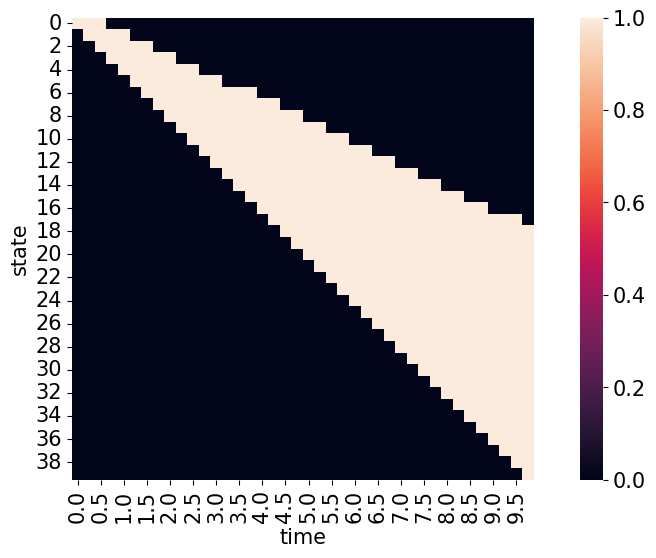

In [18]:
# WHEN IT IS IN THE MONEY
sns.heatmap(undertree > STRIKE, square=True);

Looking at the above charts, no it is not exercised quite everytime the callable bond is in the money

***

# 3. Option Adjusted Spread

*This section is optional. No need to submit it, but we will likely discuss it in class.*

## 3.1 Calculate the OAS

The **option adjusted spread** is the spread one would need to add to the spot curve, (the discounts), to get the modeled price to match the market price of the derivative. That is, how many bps would you need to add or subtract to all the spot rates in order to perfectly price this callable bond? 

* Ignore the effect of the parallel shift in rates on the forward vols. (No need to recalculate section 1.) 

* Use the parallel shifts to recalibrate the $\theta$ parameters in the BDT tree. 

Report the OAS needed to add (or subtract) in a parallel shift in spot to correctly model the callable bond.

#### Note:
This **OAS** is a common way to quote whether a derivative seems to be undervalued (positive OAS) or overvalued (negative OAS.) Of course, the OAS is dependent on our modeling choices, so it could also indicate the model is bad.

## 3.2 Convexity

Continue with parallel shifts of the (present, market quoted) yield curve. 
* Plot the relationship between the value of the callable bond as the spot curve shifts higher and lower.
* Do you see convexity in this relationship?

***